In [1]:
import numpy as np
import pandas as pd

## Load dữ liệu từ file json
dataframe real_data bao gồm các thông tin về điểm , quê quán, giới tính , trạng thái có thu thập được dữ liệu hay không  của sinh viên
dataframe data_jobStudent chứa thông tin về lương của sinh viên đã thu thập được và chưa thu thập được
dataframe data_jobCourse chứa thông tin về tất cả các môn học được giảng dạy trong trường




In [164]:
real_data = pd.read_json('G:/Data/JobSuggest/real_data.json')
data = pd.read_json('G:/Data/JobSuggest/onetable.json' , encoding = 'utf8')
data_jobStudent = pd.read_json('G:/Data/JobSuggest/db.json/db/job_suggest_jobStudent.json' , encoding = 'utf8')
data_jobCourse = pd.read_json('G:/Data/JobSuggest/db.json/db/job_suggest_jobCourse.json' , encoding = 'utf8')

## Xem trước một số thông tin về dataframe

In [165]:
real_data.shape

(2285, 340)

In [166]:
real_data.head()

,010348,010438,030320,050301,050302,050303,050304,050305,050306,050307,...,A1,A2,A3,diemtichluy,gender,hometown,id,isreal,status,tctl
0,NaN,NaN,NaN,NaN,7.3,NaN,9.0,7.2,9.2,6.7,...,NaN,NaN,NaN,2.77,1,Thái Bình,1,0,3,172
1,NaN,NaN,NaN,NaN,7.3,NaN,8.5,8.5,NaN,8.7,...,NaN,NaN,NaN,3.06,1,Thanh Hóa,2,0,3,172
2,NaN,NaN,NaN,NaN,4.8,NaN,2.7,6.3,8.8,7.3,...,NaN,NaN,NaN,2.66,0,TP Hà nội,4,0,3,172
3,NaN,NaN,NaN,NaN,7.6,NaN,9.0,6.5,NaN,8.3,...,NaN,NaN,NaN,2.90,1,Nam Định,5,0,3,172
4,NaN,NaN,NaN,NaN,6.8,NaN,3.0,6.8,8.5,6.5,...,NaN,NaN,NaN,2.29,1,Nam Định,7,0,3,172


In [167]:
data_jobStudent.head()

,birthday,choose_ology,classid,department,diemtichluy,ecourseid,eologyid,gender,hometown,id,job,salary,tctl,workplace
0,1993-07-31,NaN,0,None,2.77,26,38,1,Thái Bình,1,None,5000000,172,None
1,1993-06-04,NaN,0,None,3.06,26,38,1,Thanh Hóa,2,None,6000000,172,None
2,1993-10-18,NaN,0,None,2.66,26,38,0,TP Hà nội,4,None,3000000,172,None
3,1993-12-06,NaN,0,None,2.90,26,38,1,Nam Định,5,None,7000000,172,None
4,1993-06-05,NaN,0,None,2.29,26,38,1,Nam Định,7,None,5500000,172,None


## Chọn lọc các môn học quan trọng đối với sinh viên ngành công nghệ thông tin 



In [168]:
#convert list_course_feature from text to id
list_course_name = ['Kỹ thuật lập trình' , 'Cấu trúc dữ liệu và giải thuật' ,
                       'Cơ sở dữ liệu' ,'Lập trình hướng đối tượng' , 'Thiết kế web' , 'Phân tích thiết kế hệ thống',
                      'Công nghệ XML' , 'Mạng máy tính' , 'Toán rời rạc' , 'Tiếng Anh chuyên ngành (Khối ngành Máy tính và CNTT)']
list_cid_feature = []
for i in range(len(data_jobCourse)):
    if(data_jobCourse['display'][i] in list_course_name):
        list_cid_feature.append(data_jobCourse['name'][i])

In [169]:
list_cid_feature

['050335',
 '050305',
 '050316',
 '050322',
 '050302',
 '050320',
 '050330',
 '050373',
 '050304',
 '0503127',
 '0503130',
 '0503137',
 '0503156',
 '0503105',
 '0503103',
 '0503150',
 '1303131',
 '0503106',
 '050402',
 '050403']

In [170]:
salary = data_jobStudent['salary']

In [171]:
real_data = pd.concat([salary , real_data] , axis = 1)

In [172]:
list_cid_feature.append('diemtichluy')
list_cid_feature.append('gender')
list_cid_feature.append('hometown')
list_cid_feature.append('id')
list_cid_feature.append('status')
list_cid_feature.append('tctl')
list_cid_feature.append('isreal')
list_cid_feature.append('salary')
real_data = real_data.filter(items = list_cid_feature)

In [173]:
real_data.head()

,050335,050305,050316,050322,050302,050320,050330,050373,050304,0503127,...,050402,050403,diemtichluy,gender,hometown,id,status,tctl,isreal,salary
0,5.5,7.2,7.3,7.5,7.3,1.3,7.2,9.7,9.0,NaN,...,NaN,NaN,2.77,1,Thái Bình,1,3,172,0,5000000
1,8.3,8.5,10.0,8.2,7.3,6.0,8.5,9.7,8.5,NaN,...,NaN,NaN,3.06,1,Thanh Hóa,2,3,172,0,6000000
2,7.3,6.3,5.0,6.2,4.8,4.7,7.5,6.0,2.7,NaN,...,NaN,NaN,2.66,0,TP Hà nội,4,3,172,0,3000000
3,8.2,6.5,8.5,5.5,7.6,7.7,8.5,7.7,9.0,NaN,...,NaN,NaN,2.90,1,Nam Định,5,3,172,0,7000000
4,2.8,6.8,7.2,3.7,6.8,2.0,5.5,0.0,3.0,NaN,...,NaN,NaN,2.29,1,Nam Định,7,3,172,0,5500000


## Lấy dữ liệu đã thu thập được chính xác lương và tách thành feature và target

In [338]:
X_train = real_data[real_data['isreal'] == 1].filter(items = list_cid_feature)

Y_train = real_data[real_data['isreal'] == 1]['salary']

In [237]:
X_train.drop(['isreal' , 'salary'] , axis = 1 , inplace = True)

In [238]:
X_train.shape

(214, 26)

# Quan sát dữ liệu của điểm tích lũy và tiền lương

In [ ]:
'050316' ,'050302' , '050305' , '050320'

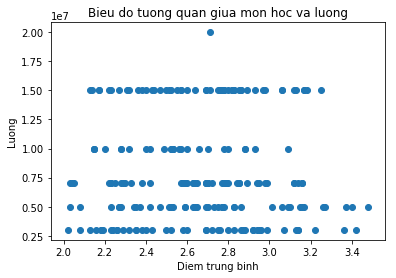

In [342]:
#quan sat du lieu cua mon ky thuat lap trinh va tien luong
import matplotlib.pyplot as plt

plt.scatter(X_train['diemtichluy'] , Y_train)
plt.title("Bieu do tuong quan giua mon hoc va luong")
plt.xlabel('Diem trung binh')
plt.ylabel('Luong')
plt.show()

In [343]:
X_train.head()

,050335,050305,050316,050322,050302,050320,050330,050373,050304,0503127,...,050402,050403,diemtichluy,gender,hometown,id,status,tctl,isreal,salary
413,6.0,6.7,4.5,6.7,6.7,5.6,6.2,7.1,7.3,NaN,...,NaN,NaN,2.58,0,Thái Bình,560,3,172,1,7000000
414,6.0,9.3,7.2,7.3,8.0,5.7,6.6,4.3,7.0,NaN,...,NaN,NaN,2.63,0,Thái Bình,562,3,172,1,5000000
416,7.0,5.3,8.7,6.7,6.7,5.8,6.3,5.3,7.0,NaN,...,NaN,NaN,2.40,1,Sơn La,565,3,172,1,3000000
417,6.7,9.3,9.7,6.5,8.8,9.3,8.8,9.6,9.0,NaN,...,NaN,NaN,3.12,1,Bắc Giang,566,3,172,1,15000000
418,8.0,8.8,8.6,6.7,6.8,8.3,7.8,9.2,8.8,NaN,...,NaN,NaN,2.78,1,Hòa Bình,568,3,172,1,15000000


In [344]:
list_cid_feature

['050335',
 '050305',
 '050316',
 '050322',
 '050302',
 '050320',
 '050330',
 '050373',
 '050304',
 '0503127',
 '0503130',
 '0503137',
 '0503156',
 '0503105',
 '0503103',
 '0503150',
 '1303131',
 '0503106',
 '050402',
 '050403',
 'diemtichluy',
 'gender',
 'hometown',
 'id',
 'status',
 'tctl',
 'isreal',
 'salary']

## Loại bỏ những môn không cần thiết và bị null quá nhiều

In [345]:
X_test = real_data[real_data['isreal'] == 0].filter(items = list_cid_feature)

Y_test = real_data[real_data['isreal'] == 0]['salary']

In [346]:
X_train.drop(['0503130', '0503137', '0503156', '0503105','0503103', '0503150', '1303131', '0503106', '050402','050403' , '0503127'] , axis = 1 , inplace = True )

In [347]:
X_test.drop(['0503130', '0503137', '0503156', '0503105','0503103', '0503150', '1303131', '0503106', '050402','050403' , 'salary' , 'isreal' , '0503127'] , axis = 1 , inplace = True )

In [348]:
X_train.head()

,050335,050305,050316,050322,050302,050320,050330,050373,050304,diemtichluy,gender,hometown,id,status,tctl,isreal,salary
413,6.0,6.7,4.5,6.7,6.7,5.6,6.2,7.1,7.3,2.58,0,Thái Bình,560,3,172,1,7000000
414,6.0,9.3,7.2,7.3,8.0,5.7,6.6,4.3,7.0,2.63,0,Thái Bình,562,3,172,1,5000000
416,7.0,5.3,8.7,6.7,6.7,5.8,6.3,5.3,7.0,2.40,1,Sơn La,565,3,172,1,3000000
417,6.7,9.3,9.7,6.5,8.8,9.3,8.8,9.6,9.0,3.12,1,Bắc Giang,566,3,172,1,15000000
418,8.0,8.8,8.6,6.7,6.8,8.3,7.8,9.2,8.8,2.78,1,Hòa Bình,568,3,172,1,15000000


In [349]:
X_test.head()

,050335,050305,050316,050322,050302,050320,050330,050373,050304,diemtichluy,gender,hometown,id,status,tctl
0,5.5,7.2,7.3,7.5,7.3,1.3,7.2,9.7,9.0,2.77,1,Thái Bình,1,3,172
1,8.3,8.5,10.0,8.2,7.3,6.0,8.5,9.7,8.5,3.06,1,Thanh Hóa,2,3,172
2,7.3,6.3,5.0,6.2,4.8,4.7,7.5,6.0,2.7,2.66,0,TP Hà nội,4,3,172
3,8.2,6.5,8.5,5.5,7.6,7.7,8.5,7.7,9.0,2.90,1,Nam Định,5,3,172
4,2.8,6.8,7.2,3.7,6.8,2.0,5.5,0.0,3.0,2.29,1,Nam Định,7,3,172


In [350]:
features = X_train.columns
features

Index(['050335', '050305', '050316', '050322', '050302', '050320', '050330',
       '050373', '050304', 'diemtichluy', 'gender', 'hometown', 'id', 'status',
       'tctl', 'isreal', 'salary'],
      dtype='object')

## Các features được đưa vào model để huấn luyện

In [351]:
for i in range(len(data_jobCourse)):
        if(data_jobCourse['name'][i] in features):
            print(data_jobCourse['display'][i])

Toán rời rạc
Cơ sở dữ liệu
Kỹ thuật lập trình
Mạng máy tính
Cấu trúc dữ liệu và giải thuật
Lập trình hướng đối tượng
Phân tích thiết kế hệ thống
Thiết kế web
Công nghệ XML


## Xử lí các dữ liệu bị trống và chuyển thuộc tính quê quán về dạng category

In [352]:
#impute missing value
for i in range(9):
    X_train[features[i]].fillna(X_train[features[i]].mean() , inplace = True)
    X_test[features[i]].fillna(X_test[features[i]].mean() , inplace = True)

In [353]:
X_train['hometown'] = X_train['hometown'].astype('category')
X_train['hometown'] =  X_train['hometown'].cat.codes

In [354]:
X_test['hometown'] = X_test['hometown'].astype('category')
X_test['hometown'] =  X_test['hometown'].cat.codes

In [355]:
X_train.shape

(214, 17)

In [356]:
X_train.isnull().sum() / X_train.count()

050335         0.0
050305         0.0
050316         0.0
050322         0.0
050302         0.0
050320         0.0
050330         0.0
050373         0.0
050304         0.0
diemtichluy    0.0
gender         0.0
hometown       0.0
id             0.0
status         0.0
tctl           0.0
isreal         0.0
salary         0.0
dtype: float64

In [357]:
X_test.shape

(2071, 15)

In [358]:
X_test.isnull().sum() / X_test.count()

050335         0.0
050305         0.0
050316         0.0
050322         0.0
050302         0.0
050320         0.0
050330         0.0
050373         0.0
050304         0.0
diemtichluy    0.0
gender         0.0
hometown       0.0
id             0.0
status         0.0
tctl           0.0
dtype: float64

## Training model 

In [359]:
from sklearn.ensemble import RandomForestRegressor

train_id = np.array(X_train['id'])
test_id = np.array(X_test['id'])
X_train = X_train[['050316' ,'050302' , '050305' , '050320' ]]
X_test = X_test[['050316' ,'050302' , '050305' , '050320' ]]

#Random forest model
random_forest_model = RandomForestRegressor(n_jobs = -1, min_samples_leaf = 1 , n_estimators = 200)
random_forest_model.fit(X_train , Y_train)
random_forest_model.score(X_train , Y_train)

0.8456346332142068

In [360]:
print(test_id.shape)
print(X_test.shape)

(2071,)
(2071, 4)


In [361]:
predict = random_forest_model.predict(X_test) 
salary = pd.DataFrame({'salary' : predict , 'id' : test_id })
predict_salary =  salary

In [362]:
predict_salary.describe()

,id,salary
count,2071.000000,2.071000e+03
mean,2853.179141,8.125338e+06
std,1951.464314,1.462460e+06
min,1.000000,4.160000e+06
25%,978.000000,7.330000e+06
50%,4043.000000,7.680000e+06
75%,4655.500000,8.935000e+06
max,5333.000000,1.371500e+07


In [363]:
Y_train.describe()

count    2.140000e+02
mean     8.144860e+06
std      4.511076e+06
min      3.000000e+06
25%      5.000000e+06
50%      7.000000e+06
75%      1.000000e+07
max      2.000000e+07
Name: salary, dtype: float64

In [364]:
print(predict_salary.shape)
predict_salary.describe()

(2071, 2)


,id,salary
count,2071.000000,2.071000e+03
mean,2853.179141,8.125338e+06
std,1951.464314,1.462460e+06
min,1.000000,4.160000e+06
25%,978.000000,7.330000e+06
50%,4043.000000,7.680000e+06
75%,4655.500000,8.935000e+06
max,5333.000000,1.371500e+07


In [365]:
#KNN model
from sklearn.neighbors import KNeighborsClassifier
kneigh = KNeighborsClassifier(n_neighbors=3) 
kneigh.fit(X_train, Y_train) 
print(kneigh.score(X_train , Y_train))
kneigh_predict = pd.DataFrame({'salary' :kneigh.predict(X_test) , 'id' : test_id})
kneigh_predict.describe()

0.5373831775700935


,id,salary
count,2071.000000,2.071000e+03
mean,2853.179141,7.724288e+06
std,1951.464314,4.337321e+06
min,1.000000,3.000000e+06
25%,978.000000,3.000000e+06
50%,4043.000000,7.000000e+06
75%,4655.500000,1.000000e+07
max,5333.000000,1.500000e+07


In [366]:
array_x_test = np.array(X_test)
X_test = pd.DataFrame(array_x_test , columns = ['050316' ,'050302' , '050305' , '050320'])
test_df =  pd.concat([kneigh_predict , X_test] , axis = 1)

In [367]:
test_df.describe()

,id,salary,050316,050302,050305,050320
count,2071.000000,2.071000e+03,2071.000000,2071.000000,2071.000000,2071.000000
mean,2853.179141,7.724288e+06,7.107235,6.409197,6.451875,6.359862
std,1951.464314,4.337321e+06,1.362119,1.455485,1.277563,1.925481
min,1.000000,3.000000e+06,0.000000,0.000000,0.000000,0.000000
25%,978.000000,3.000000e+06,6.500000,5.800000,6.000000,5.800000
50%,4043.000000,7.000000e+06,7.107235,6.409197,6.451875,6.359862
75%,4655.500000,1.000000e+07,7.800000,7.200000,7.200000,7.500000
max,5333.000000,1.500000e+07,10.000000,10.000000,10.000000,10.000000


In [368]:
test_df.isnull().sum()

id        0
salary    0
050316    0
050302    0
050305    0
050320    0
dtype: int64

In [369]:
Y_train = pd.DataFrame({'salary' : Y_train , 'id' : train_id})
train_df = pd.concat([X_train , Y_train] , axis= 1)

In [370]:
train_df.describe()

,050316,050302,050305,050320,id,salary
count,214.000000,214.000000,214.000000,214.000000,214.000000,2.140000e+02
mean,7.214486,5.900935,6.858000,6.250500,1054.257009,8.144860e+06
std,1.835801,1.927293,1.446068,2.140708,1131.705445,4.511076e+06
min,0.000000,0.000000,0.000000,0.000000,560.000000,3.000000e+06
25%,6.200000,4.800000,5.850000,5.100000,651.250000,5.000000e+06
50%,7.300000,6.200000,6.858000,6.250500,768.500000,7.000000e+06
75%,8.700000,7.300000,8.000000,7.775000,879.750000,1.000000e+07
max,10.000000,9.400000,9.700000,10.000000,5307.000000,2.000000e+07


## Kết hợp dữ liệu thu thập được và dữ liệu dùng mô hình để dự đoán mức lương

In [371]:
train_df = np.array(train_df)
train_df = pd.DataFrame(train_df, columns = ['050316' ,'050302' , '050305' , '050320' , 'salary' , 'id'])
train_df_new  = pd.concat([train_df , test_df])

In [372]:
train_df_new.describe()

,050302,050305,050316,050320,id,salary
count,2285.000000,2285.000000,2285.000000,2285.000000,2.285000e+03,2.285000e+03
mean,6.361596,6.489911,7.117279,6.349620,7.653868e+05,7.000974e+06
std,1.512708,1.299330,1.413082,1.946403,2.743599e+06,4.702667e+06
min,0.000000,0.000000,0.000000,0.000000,1.000000e+00,5.600000e+02
25%,5.700000,6.000000,6.500000,5.700000,1.053000e+03,3.000000e+06
50%,6.409197,6.451875,7.107235,6.359862,4.171000e+03,7.000000e+06
75%,7.200000,7.200000,8.000000,7.500000,4.847000e+03,1.000000e+07
max,10.000000,10.000000,10.000000,10.000000,2.000000e+07,1.500000e+07


In [373]:
train_df_new.isnull().sum() / X_train.count()

050302    0.0
050305    0.0
050316    0.0
050320    0.0
id        NaN
salary    NaN
dtype: float64

## Phân chia tập dữ liệu huấn luyện và tập dữ liệu kiểm tra

In [374]:
#train test split
from sklearn.cross_validation import train_test_split
features_rdf = train_df_new.drop('salary' , axis = 1)
target_rdf = train_df_new['salary']

x_train, x_test, y_train, y_test = train_test_split(features_rdf, target_rdf, test_size=0.33, random_state=42)

train_id = x_train['id']
test_id = x_test['id']

x_train.drop('id' , inplace = True)
x_test.drop('id' , inplace = True)

E:\dev\Anaconda3\envs\keras_with_python3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
E:\dev\Anaconda3\envs\keras_with_python3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


## Huấn luyện model sử dụng tập dữ liệu được kết hợp

In [407]:
# random forest model
random_forest_model = RandomForestRegressor(n_jobs = -1, min_samples_leaf = 1 , n_estimators = 200)
random_forest_model.fit(x_train , y_train)
print(random_forest_model.score(x_train,y_train))
rdf_predict = pd.DataFrame({'salary' : random_forest_model.predict(x_test) })
rdf_predict_df = pd.DataFrame({'salary' : random_forest_model.predict(x_test) , 'id' : test_id})
rdf_predict.describe()

0.9297225790901977


,salary
count,7.550000e+02
mean,7.083991e+06
std,3.213949e+06
min,6.717250e+02
25%,5.240000e+06
50%,7.225000e+06
75%,1.000000e+07
max,1.473000e+07


In [405]:
# LASSO model
from sklearn.linear_model import Ridge
ridge = linear_model.Ridge(alpha=0.1)
ridge.fit(x_train, y_train) 
print(ridge.score(x_train , y_train))
ridge_predict = pd.DataFrame({'salary' : ridge.predict(x_test) })
ridge_predict_df = pd.DataFrame({'salary' : ridge.predict(x_test) , 'id' : test_id})


0.18138637835879934


In [406]:
ridge_predict.describe()

,salary
count,7.550000e+02
mean,6.979214e+06
std,2.142017e+06
min,-6.951340e+06
25%,7.204138e+06
50%,7.561645e+06
75%,7.688896e+06
max,9.005916e+06


In [381]:
y_test.describe()

count    7.550000e+02
mean     6.973629e+06
std      4.710197e+06
min      5.750000e+02
25%      3.000000e+06
50%      7.000000e+06
75%      1.000000e+07
max      1.500000e+07
Name: salary, dtype: float64

## Sử dụng r2_score để kiểm tra độ chính xác

In [378]:
from sklearn.metrics import r2_score
rdf_score = r2_score(y_test , rdf_predict)
knn_score = r2_score(y_test , kneigh_predict)
print('random forest r2_metric score : ' , rdf_score)
print('knn r2_metric score : ' , knn_score)

random forest r2_metric score :  0.471614642875283
knn r2_metric score :  -0.28621029077754256


## Đánh giá sinh viên dựa trên lương và in thông tin ra file cvs
### Nếu sinh viên có thu nhập lớn hơn hoặc bằng 6 000 000 thì được đánh giá là phù hợp với ngành , ngược lại nếu nhỏ hơn 6 000 000 thì được đánh giá là không phù hợp

In [397]:
rdf_predict_df['danhgia'] = rdf_predict_df['salary'].apply(lambda x : 'không phù hợp' if x < 6000000 else 'phù hợp')

In [398]:
rdf_predict_df.describe()

,id,salary
count,7.550000e+02,7.550000e+02
mean,7.959228e+05,7.116572e+06
std,2.858447e+06,3.208705e+06
min,7.000000e+00,6.668800e+02
25%,1.011500e+03,5.412500e+06
50%,4.146000e+03,7.245000e+06
75%,4.849000e+03,1.000000e+07
max,2.000000e+07,1.478000e+07


In [399]:
#In thông tin ra file csv
rdf_predict_df.to_csv('C:/Users/Luan/Desktop/danhgiasinhvien.csv' , index = False)